# SPEED DATING EXPERIMENT

### DS-GA-23 Final Project
#### Miranda Remmer


****

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, feature_selection, neighbors, metrics, grid_search, cross_validation

%run 'functions_datingexp.ipynb'

%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)

In [2]:
df_raw = pd.read_csv(os.path.join('..', 'CODE', 'speed-dating-experiment', 'Speed Dating Data.csv'))

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


Look at the data to check the column names:

In [3]:
df_raw.columns

Index([u'iid', u'id', u'gender', u'idg', u'condtn', u'wave', u'round',
       u'position', u'positin1', u'order',
       ...
       u'attr3_3', u'sinc3_3', u'intel3_3', u'fun3_3', u'amb3_3', u'attr5_3',
       u'sinc5_3', u'intel5_3', u'fun5_3', u'amb5_3'],
      dtype='object', length=195)

In [4]:
df_raw

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


### Creating New Dataset with Desired Columns


In [5]:
subset_df = df_raw[['iid', 'pid', 'gender', 'age', 'round',
                    'match', 'dec', 'dec_o', 
                    'exphappy', 'expnum', 'match_es', 
                    'like', 'prob', 'like_o', 'prob_o', 
                    'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 
                    'attr3_2', 'sinc3_2', 'fun3_2', 'intel3_2', 'amb3_2', 
                    'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 
                    'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2', 
                    'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s',
                    'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 
                    'attr_o', 'sinc_o', 'intel_o', 'fun_o','amb_o','shar_o']]
subset_df

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,1,11.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,7.0,6.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0
1,1,12.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,8.0,5.0,6.0,7.0,8.0,10.0,7.0,7.0,5.0
2,1,13.0,0,21.0,10,1,1,1,3.0,2.0,...,9.0,8.0,5.0,7.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,14.0,0,21.0,10,1,1,1,3.0,2.0,...,8.0,7.0,6.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0
4,1,15.0,0,21.0,10,1,1,1,3.0,2.0,...,7.0,7.0,6.0,6.0,8.0,7.0,9.0,6.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,526.0,1,25.0,22,0,0,1,10.0,NaN,...,5.0,5.0,NaN,NaN,10.0,5.0,3.0,2.0,6.0,5.0
8374,552,527.0,1,25.0,22,0,0,0,10.0,NaN,...,8.0,4.0,4.0,NaN,6.0,3.0,7.0,3.0,7.0,2.0
8375,552,528.0,1,25.0,22,0,0,0,10.0,NaN,...,8.0,8.0,8.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0
8376,552,529.0,1,25.0,22,0,0,1,10.0,NaN,...,5.0,4.0,NaN,5.0,5.0,7.0,5.0,5.0,3.0,6.0


In [6]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 52 columns):
iid         8378 non-null int64
pid         8368 non-null float64
gender      8378 non-null int64
age         8283 non-null float64
round       8378 non-null int64
match       8378 non-null int64
dec         8378 non-null int64
dec_o       8378 non-null int64
exphappy    8277 non-null float64
expnum      1800 non-null float64
match_es    7205 non-null float64
like        8138 non-null float64
prob        8069 non-null float64
like_o      8128 non-null float64
prob_o      8060 non-null float64
attr3_1     8273 non-null float64
sinc3_1     8273 non-null float64
fun3_1      8273 non-null float64
intel3_1    8273 non-null float64
amb3_1      8273 non-null float64
attr3_2     7463 non-null float64
sinc3_2     7463 non-null float64
fun3_2      7463 non-null float64
intel3_2    7463 non-null float64
amb3_2      7463 non-null float64
attr5_1     4906 non-null float64
sinc5_1     4906 non-

## Clean Up Data

- Drop rows with irrelevant data
- Insert missing data where relevant 


### Cleaning up data: PART 1: Remove rows with NaN values

In [7]:
# Create new DF for cleaned data
subset_df_clean = subset_df[:]

#### Remove any data where subject or their partner didn't particpate during experiment.  

I.e. any values where subject didn't rate partner & partner didn't rate subject. 
In the instances where subject rated partner but partner didn't rate subject, or vice versa, possible conclusion that person in question didn't want to rate on a low scale.  With such cases, fill NaN values with 0.  

In [8]:
df_nan_exp_ratings_all = subset_df_clean[(subset_df_clean.attr_o.isnull()) & (subset_df_clean.sinc_o.isnull()) & (subset_df_clean.fun_o.isnull()) &
                   (subset_df_clean.intel_o.isnull()) &  (subset_df_clean.amb_o.isnull()) & (subset_df_clean.shar_o.isnull()) & (subset_df_clean.attr.isnull()) & (subset_df_clean.sinc.isnull()) & (subset_df_clean.fun.isnull()) &
                   (subset_df_clean.intel.isnull()) &  (subset_df_clean.amb.isnull()) & (subset_df_clean.shar.isnull())]

len(df_nan_exp_ratings_all)

132

In [9]:
len(subset_df_clean) #test

8378

In [10]:
# Dropping Data
subset_df_clean = dropData(subset_df_clean, df_nan_exp_ratings_all)

In [11]:
len(subset_df_clean) #test

8246

#### Remove any data where participant didn't fill out survey questions pertaining to research question:

In [12]:
#create sub-df to pull any data with missing values for features 3_1; 3_1; 5_1; 5_2
df_viewself_nan = subset_df_clean[(subset_df_clean.attr3_1.isnull()) & (subset_df_clean.sinc3_1.isnull()) &
                                  (subset_df_clean.fun3_1.isnull()) & (subset_df_clean.intel3_1.isnull()) & 
                                  (subset_df_clean.amb3_1.isnull()) & 
                                  (subset_df_clean.attr3_2.isnull()) & (subset_df_clean.sinc3_2.isnull()) &
                                  (subset_df_clean.fun3_2.isnull()) & (subset_df_clean.intel3_2.isnull()) & 
                                  (subset_df_clean.amb3_2.isnull()) & 
                                  (subset_df_clean.attr5_1.isnull()) & (subset_df_clean.sinc5_1.isnull()) &
                                  (subset_df_clean.fun5_1.isnull()) & (subset_df_clean.intel5_1.isnull()) & 
                                  (subset_df_clean.amb5_1.isnull()) & 
                                  (subset_df_clean.attr5_2.isnull()) & (subset_df_clean.sinc5_2.isnull()) &
                                  (subset_df_clean.fun5_2.isnull()) & (subset_df_clean.intel5_2.isnull()) & 
                                  (subset_df_clean.amb5_2.isnull())]
#attr
#sinc
#fun
#intel
#amb

                                  

len(df_viewself_nan)

44

In [13]:
#view data
df_viewself_nan[['iid', 'attr', 'attr_o', 'attr5_1', 'fun3_2', 'match_es', 'attr3_s']]

,iid,attr,attr_o,attr5_1,fun3_2,match_es,attr3_s
312,28,3.0,8.0,NaN,NaN,3.0,NaN
313,28,2.0,8.0,NaN,NaN,3.0,NaN
314,28,3.0,7.0,NaN,NaN,3.0,NaN
315,28,4.0,5.0,NaN,NaN,3.0,NaN
316,28,4.0,5.0,NaN,NaN,3.0,NaN
...,...,...,...,...,...,...,...
6405,414,10.0,6.0,NaN,NaN,2.0,8.0
6406,414,10.0,7.0,NaN,NaN,2.0,8.0
6407,414,7.0,4.0,NaN,NaN,2.0,8.0
6408,414,7.0,7.0,NaN,NaN,2.0,8.0


In [14]:
# Dropping Data
subset_df_clean =dropData(subset_df_clean, df_viewself_nan) 

#### Look at data where subject didn't rate partner:

In [15]:
# Grabbing subject data with no scores for partner 
##(partner has scored subject)
df_atr_null = subset_df_clean[(subset_df_clean.attr.isnull()) & (subset_df_clean.sinc.isnull()) 
                            & (subset_df_clean.fun.isnull()) & (subset_df_clean.intel.isnull()) 
                             &  (subset_df_clean.amb.isnull()) & (subset_df_clean.shar.isnull())]
                              
# View data                              
df_atr_null[['iid', 'pid', 'like', 'prob', 'like_o', 'prob_o']]

,iid,pid,like,prob,like_o,prob_o
245,23,53.0,NaN,NaN,7.0,6.0
705,50,32.0,7.0,7.0,6.0,3.0
711,50,38.0,7.0,8.0,7.0,6.0
712,50,39.0,8.0,NaN,7.0,5.0
920,67,58.0,NaN,NaN,6.0,7.0
...,...,...,...,...,...,...
8002,535,529.0,NaN,NaN,5.0,5.0
8003,535,530.0,NaN,NaN,8.0,5.0
8045,537,528.0,NaN,NaN,1.0,1.0
8067,538,528.0,NaN,NaN,2.0,2.0


In [16]:
# Look at data where subject didnt rate any attributes of parter but subject said 'yes'
##looking at values where dec = 1 from above DF (can drop)
                              
df_atr_null_dec1 = df_atr_null[(df_atr_null.dec == 1)]

# View data
df_atr_null_dec1 [['iid', 'pid', 'dec', 'prob', 'like']]
#includes'like' = NaN but subject said 'yes' (dec = 1) 

##remove; doesn't makse sense to late put '0' in attribute ratings

,iid,pid,dec,prob,like
705,50,32.0,1,7.0,7.0
711,50,38.0,1,8.0,7.0
7216,488,476.0,1,NaN,NaN


In [17]:
subset_df_clean = dropData(subset_df_clean, df_atr_null_dec1)

In [18]:
## have to re-create df_atr_null since values had been dropped:
df_atr_null = subset_df_clean[(subset_df_clean.attr.isnull()) & (subset_df_clean.sinc.isnull()) 
                            & (subset_df_clean.fun.isnull()) & (subset_df_clean.intel.isnull()) 
                             &  (subset_df_clean.amb.isnull()) & (subset_df_clean.shar.isnull())]
len(df_atr_null)                          

55

In [19]:
#Look where dec=0; see if anything odd
df_atr_null_dec0 = df_atr_null[df_atr_null.dec ==0]
df_atr_null_dec0

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
245,23,53.0,0,21.0,16,0,0,1,5.0,3.0,...,NaN,NaN,NaN,NaN,7.0,8.0,8.0,7.0,8.0,6.0
712,50,39.0,1,27.0,19,0,0,1,5.0,7.0,...,NaN,NaN,NaN,NaN,5.0,6.0,8.0,10.0,8.0,NaN
920,67,58.0,1,22.0,10,0,0,1,5.0,1.0,...,NaN,NaN,NaN,NaN,7.0,7.0,8.0,5.0,NaN,4.0
2346,170,144.0,1,28.0,16,0,0,0,6.0,NaN,...,NaN,NaN,NaN,NaN,5.0,7.0,8.0,6.0,7.0,5.0
2540,187,176.0,1,26.0,10,0,0,0,6.0,NaN,...,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8002,535,529.0,1,23.0,22,0,0,1,6.0,NaN,...,NaN,NaN,NaN,NaN,6.0,5.0,5.0,5.0,NaN,NaN
8003,535,530.0,1,23.0,22,0,0,1,6.0,NaN,...,NaN,NaN,NaN,NaN,8.0,8.0,9.0,9.0,7.0,8.0
8045,537,528.0,1,22.0,22,0,0,0,7.0,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,2.0,4.0,1.0,1.0
8067,538,528.0,1,32.0,22,0,0,0,6.0,NaN,...,NaN,NaN,NaN,NaN,2.0,4.0,3.0,6.0,1.0,2.0


In [20]:
#Grabing subject data with no scores for partner but has a score for like 
##(determine if data is irrelvant & should be dropped or if attribute scores for partner should be filled in)
##(partner has scored subject)

df_atr_null_likeV = df_atr_null[df_atr_null.like.notnull()]
len(df_atr_null_likeV) 

3

In [21]:
# View Data
df_atr_null_likeV[['iid', 'pid', 'match', 'dec', 'dec_o', 'match_es', 
                    'like', 'prob', 'like_o', 'prob_o', 
                 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 
                    'attr_o', 'sinc_o', 'intel_o','attr5_1', 'attr5_2', 'intel5_2', 'attr3_s']]

,iid,pid,match,dec,dec_o,match_es,like,prob,like_o,prob_o,...,fun,amb,shar,attr_o,sinc_o,intel_o,attr5_1,attr5_2,intel5_2,attr3_s
712,50,39.0,0,0,1,5.0,8.0,NaN,7.0,5.0,...,NaN,NaN,NaN,5.0,6.0,8.0,NaN,NaN,NaN,NaN
2546,187,182.0,0,0,0,NaN,5.0,6.0,9.0,8.0,...,NaN,NaN,NaN,6.0,8.0,9.0,NaN,NaN,NaN,9.0
7639,519,540.0,0,0,0,0.5,6.0,8.0,5.0,3.0,...,NaN,NaN,NaN,6.0,7.0,6.0,8.0,NaN,NaN,NaN


**Observations:** Data in first 2 rows looks like it should get dropped as those subject's didn't include any data for survey data re. their own attributes. 

Row 3, however, [index 7639] is interesting b/c person rated themselves higher on attraction with a higher prob partner would select them; while partner rated them lower for attr and a lower like score, thus resulting in no match. 

In [22]:
# Dropping the above data
subset_df_clean =dropData(subset_df_clean, df_atr_null_likeV)

#### Look at data where partner didn't rate subject:

(coded with _o at end)

In [23]:
#pulling data for NaN values for partner rating of subject (all attribute_o ratings that are blank)
df_atr_o_null = subset_df_clean[(subset_df_clean.attr_o.isnull()) & (subset_df_clean.sinc_o.isnull()) 
                            & (subset_df_clean.fun_o.isnull()) & (subset_df_clean.intel_o.isnull()) 
                             &  (subset_df_clean.amb_o.isnull()) & (subset_df_clean.shar_o.isnull())]
df_atr_o_null 

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
386,32,50.0,0,27.0,16,0,0,1,3.0,0.0,...,8.0,9.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
482,38,50.0,0,23.0,16,1,1,1,2.0,12.0,...,8.0,9.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
498,39,50.0,0,24.0,16,0,1,0,2.0,5.0,...,8.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,52,28.0,1,21.0,19,0,0,0,5.0,1.0,...,7.0,5.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
753,53,23.0,1,28.0,19,0,1,0,6.0,9.0,...,8.0,7.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8102,540,519.0,1,24.0,22,0,0,0,7.0,NaN,...,6.0,6.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8192,544,521.0,1,23.0,22,0,1,0,5.0,NaN,...,8.0,7.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
8298,549,517.0,1,28.0,22,0,0,0,5.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8302,549,521.0,1,28.0,22,0,1,0,5.0,NaN,...,8.0,7.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Partner didnt rate any attributes of subject but said 'yes'
##looking at values where dec_o = 1 from above DF (can drop)
df_atr_o_null_deco1 = df_atr_o_null[df_atr_o_null.dec_o ==1]

#view data
df_atr_o_null_deco1[['iid', 'pid', 'dec', 'dec_o', 'like', 'like_o', 'prob', 'prob_o', 'attr_o', 'sinc_o', 'intel_o', 'amb_o', 'shar_o']]

,iid,pid,dec,dec_o,like,like_o,prob,prob_o,attr_o,sinc_o,intel_o,amb_o,shar_o
386,32,50.0,0,1,6.0,7.0,3.0,7.0,NaN,NaN,NaN,NaN,NaN
482,38,50.0,1,1,7.0,7.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN
7033,476,488.0,0,1,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Dropping above data 
subset_df_clean =dropData(subset_df_clean, df_atr_o_null_deco1) 

In [26]:
## have to re-create df_atr_o_null since values had been dropped:
df_atr_o_null = subset_df_clean[(subset_df_clean.attr_o.isnull()) & (subset_df_clean.sinc_o.isnull()) 
                            & (subset_df_clean.fun_o.isnull()) & (subset_df_clean.intel_o.isnull()) 
                             &  (subset_df_clean.amb_o.isnull()) & (subset_df_clean.shar_o.isnull())]
len(df_atr_o_null)

66

In [27]:
#Look at data where dec=0; see if anything odd
df_atr_o_null_deco0 = df_atr_o_null[df_atr_o_null.dec_o ==0]

# View from above data where like_o has a value
df_atr_o_null_likeoV = df_atr_o_null_deco0[df_atr_o_null_deco0.like_o.notnull()]
df_atr_o_null_likeoV[['iid', 'pid', 'like', 'like_o', 'prob_o', 'attr_o', 'sinc_o', 'intel_o', 'amb_o', 'fun_o', 'shar_o', 'dec', 'dec_o']]

,iid,pid,like,like_o,prob_o,attr_o,sinc_o,intel_o,amb_o,fun_o,shar_o,dec,dec_o
498,39,50.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2491,182,187.0,9.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
8102,540,519.0,5.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [28]:
## Removing the first row b/c like_o seems high; doesn't make sense to make attribute scores = 0
subset_df_clean = subset_df_clean.drop([498])

#### Looking at feature data 5_1 and 5_2 Null:

In [29]:
#Checking data for feature 5_1 & 5_2
df_nan_5 = subset_df_clean[(subset_df_clean.attr5_1.isnull()) & (subset_df_clean.sinc5_1.isnull()) 
                            & (subset_df_clean.fun5_1.isnull()) & (subset_df_clean.intel5_1.isnull()) 
                             &  (subset_df_clean.amb5_1.isnull()) & (subset_df_clean.attr5_2.isnull())
                           & (subset_df_clean.sinc5_2.isnull())  & (subset_df_clean.fun5_2.isnull()) 
                           & (subset_df_clean.intel5_2.isnull()) 
                             &  (subset_df_clean.amb5_2.isnull())]
len(df_nan_5) ##not removing, too many observations

3361

### Cleaning Data: Part 2 - Adding '0' to NaN Values

In [30]:
#creating seperate DF where NaN values will be re-added
subset_df_clean_edit = subset_df_clean[:]
subset_df_clean_edit

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,1,11.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,7.0,6.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0
1,1,12.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,8.0,5.0,6.0,7.0,8.0,10.0,7.0,7.0,5.0
2,1,13.0,0,21.0,10,1,1,1,3.0,2.0,...,9.0,8.0,5.0,7.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,14.0,0,21.0,10,1,1,1,3.0,2.0,...,8.0,7.0,6.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0
4,1,15.0,0,21.0,10,1,1,1,3.0,2.0,...,7.0,7.0,6.0,6.0,8.0,7.0,9.0,6.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,526.0,1,25.0,22,0,0,1,10.0,NaN,...,5.0,5.0,NaN,NaN,10.0,5.0,3.0,2.0,6.0,5.0
8374,552,527.0,1,25.0,22,0,0,0,10.0,NaN,...,8.0,4.0,4.0,NaN,6.0,3.0,7.0,3.0,7.0,2.0
8375,552,528.0,1,25.0,22,0,0,0,10.0,NaN,...,8.0,8.0,8.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0
8376,552,529.0,1,25.0,22,0,0,1,10.0,NaN,...,5.0,4.0,NaN,5.0,5.0,7.0,5.0,5.0,3.0,6.0


### Look at Feature SETS:

#### Look at Feature Set of attribute ratings (ratings of partner by subject)

In [31]:
#Grabing subject data with no scores for partner but partner scored subject
df_atr_null = subset_df_clean_edit[(subset_df_clean_edit.attr.isnull()) & (subset_df_clean_edit.sinc.isnull()) 
                            & (subset_df_clean_edit.fun.isnull()) & (subset_df_clean_edit.intel.isnull()) 
                             &  (subset_df_clean_edit.amb.isnull()) & (subset_df_clean_edit.shar.isnull()) ]
len(df_atr_null) 

52

In [32]:
#looking at values where dec = 0 from above DF; can make attribute ratings 0 
df_atr_null_dec0 = df_atr_null[df_atr_null.dec ==0]
df_atr_null_dec0[['iid', 'pid', 'dec', 'like']]

,iid,pid,dec,like
245,23,53.0,0,NaN
920,67,58.0,0,NaN
2346,170,144.0,0,NaN
2540,187,176.0,0,NaN
2542,187,178.0,0,NaN
...,...,...,...,...
8002,535,529.0,0,NaN
8003,535,530.0,0,NaN
8045,537,528.0,0,NaN
8067,538,528.0,0,NaN


In [33]:
# View from above data where like_o has no value; add '0'
like_null = df_atr_null_dec0[df_atr_null_dec0.like.isnull()]
like_null[['iid', 'pid', 'like', 'like_o', 'prob_o', 'attr', 'sinc', 'intel', 'amb_o', 'fun_o', 'shar_o', 'dec', 'dec_o']]

,iid,pid,like,like_o,prob_o,attr,sinc,intel,amb_o,fun_o,shar_o,dec,dec_o
245,23,53.0,NaN,7.0,6.0,NaN,NaN,NaN,8.0,7.0,6.0,0,1
920,67,58.0,NaN,6.0,7.0,NaN,NaN,NaN,NaN,5.0,4.0,0,1
2346,170,144.0,NaN,5.0,7.0,NaN,NaN,NaN,7.0,6.0,5.0,0,0
2540,187,176.0,NaN,2.0,1.0,NaN,NaN,NaN,5.0,5.0,5.0,0,0
2542,187,178.0,NaN,4.0,5.0,NaN,NaN,NaN,NaN,5.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8002,535,529.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,NaN,0,1
8003,535,530.0,NaN,8.0,5.0,NaN,NaN,NaN,7.0,9.0,8.0,0,1
8045,537,528.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,4.0,1.0,0,0
8067,538,528.0,NaN,2.0,2.0,NaN,NaN,NaN,1.0,6.0,2.0,0,0


In [34]:
# Add '0's into 'like' column from above df where missing
df_atr_null_dec0 = cleanFeatDF('like',df_atr_null_dec0,like_null)

In [35]:
# View data - make sure '0's went through
like_null[['iid', 'pid', 'like', 'like_o', 'prob', 'attr', 'sinc', 'intel', 'amb', 'fun', 'shar', 'dec', 'dec_o']]

,iid,pid,like,like_o,prob,attr,sinc,intel,amb,fun,shar,dec,dec_o
245,23,53.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
920,67,58.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2346,170,144.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2540,187,176.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2542,187,178.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8002,535,529.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
8003,535,530.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
8045,537,528.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
8067,538,528.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [36]:
# Add '0' into missing attr_o columns in subDF
subset_df_clean_edit = cleanFeatDF('attr', subset_df_clean_edit, df_atr_null_dec0)

In [37]:
# Add '0' into missing sinc columns in subDF
subset_df_clean_edit = cleanFeatDF('sinc', subset_df_clean_edit, df_atr_null_dec0)

In [38]:
# Add '0' into missing intel columns in subDF
subset_df_clean_edit = cleanFeatDF('intel', subset_df_clean_edit, df_atr_null_dec0)

In [39]:
# Add '0' into missing fun columns in subDF
subset_df_clean_edit = cleanFeatDF('fun', subset_df_clean_edit, df_atr_null_dec0)

In [40]:
# Add '0' into missing amb columns in subDF
subset_df_clean_edit = cleanFeatDF('amb', subset_df_clean_edit, df_atr_null_dec0)

In [41]:
# Add '0' into missing shar columns in subDF
subset_df_clean_edit = cleanFeatDF('shar', subset_df_clean_edit, df_atr_null_dec0)

In [42]:
## View subset df
df_atr_null_dec0[['iid', 'like', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]

,iid,like,attr,sinc,intel,fun,amb,shar
245,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
920,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2346,170,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2540,187,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2542,187,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8002,535,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8003,535,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8045,537,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8067,538,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
####check that '0' values transfered over
index2540= subset_df_clean_edit.loc[2540]
print index2540.like
print index2540.attr
print index2540.sinc
print index2540.intel
print index2540.fun
print index2540.amb
print index2540.dec

0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [45]:
# check len of missing data in feature set of attributes of partner by subject
checkMissing('attr', 'sinc',subset_df_clean_edit)

True


In [46]:
#re-pulling data for NaN values for subject rating of partner (all attribute ratings that are blank)
df_atr_null2 = subset_df_clean_edit[(subset_df_clean_edit.attr.isnull()) & (subset_df_clean_edit.sinc.isnull()) 
                            & (subset_df_clean_edit.fun.isnull()) & (subset_df_clean_edit.intel.isnull()) 
                             &  (subset_df_clean_edit.amb.isnull()) & (subset_df_clean_edit.shar.isnull())]
len(df_atr_null2)

0

In [47]:
## TEST count for attr = 0
true = subset_df_clean_edit[(subset_df_clean_edit.attr == 0)]
len(true)

59

In [57]:
## TEST count for attr = 0
nan = subset_df_clean_edit[(subset_df_clean_edit.attr.isnull())]
len(nan)

0

In [48]:
#running function cleanDF on attr
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_null2 , 'attr')

In [49]:
#running function cleanDF on sinc 
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_null2 , 'sinc')

In [50]:
#running function cleanDF on intl
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_null2 , 'intel')

In [51]:
#running function cleanDF on fun
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_null2 , 'fun')

In [52]:
#running function cleanDF on amb
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_null2 , 'amb')

In [53]:
#running function cleanDF on shar
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_null2 , 'shar')

In [54]:
## recheck
true2 = subset_df_clean_edit[(subset_df_clean_edit.attr == 0)]
len(true2)

69

In [59]:
## recheck
nan2 = subset_df_clean_edit[(subset_df_clean_edit.attr.isnull())]
len(nan2)

0

In [55]:
# recheck after adding 0 values to NaN (should return False)
checkMissing('attr', 'sinc',subset_df_clean_edit)

False


In [60]:
# recheck after adding 0 values to NaN (should return False)
checkMissing('intel', 'fun',subset_df_clean_edit)

False


#### Feature Set -  attribute rating_o (ratings of subject by partner)
Pull data where partner didn't rate subject

(coded with _o at end)

In [61]:
#pulling data for NaN values for partner rating of subject (all attribute_o ratings that are blank)
df_atr_o_null = subset_df_clean_edit[(subset_df_clean_edit.attr_o.isnull()) & (subset_df_clean_edit.sinc_o.isnull()) 
                            & (subset_df_clean_edit.fun_o.isnull()) & (subset_df_clean_edit.intel_o.isnull()) 
                             &  (subset_df_clean_edit.amb_o.isnull()) & (subset_df_clean_edit.shar_o.isnull())]

df_atr_o_null

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
739,52,28.0,1,21.0,19,0,0,0,5.0,1.0,...,7.0,5.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
753,53,23.0,1,28.0,19,0,1,0,6.0,9.0,...,8.0,7.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1755,122,NaN,1,22.0,10,0,0,0,6.0,10.0,...,8.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
1765,123,NaN,1,18.0,10,0,0,0,5.0,1.0,...,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1775,124,NaN,1,22.0,10,0,1,0,6.0,10.0,...,7.0,6.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,552,519.0,1,25.0,22,0,0,0,10.0,NaN,...,7.0,6.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2451,178,187.0,0,35.0,10,0,0,0,5.0,NaN,...,7.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5965,390,409.0,0,30.0,19,0,1,0,6.0,NaN,...,8.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7854,529,535.0,0,22.0,22,0,1,0,5.0,NaN,...,5.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#looking at values where dec_o = 0 from above DF; can make attribute ratings 0 
df_atr_o_null_deco0 = df_atr_o_null[df_atr_o_null.dec_o ==0]
df_atr_o_null_deco0

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
739,52,28.0,1,21.0,19,0,0,0,5.0,1.0,...,7.0,5.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
753,53,23.0,1,28.0,19,0,1,0,6.0,9.0,...,8.0,7.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1755,122,NaN,1,22.0,10,0,0,0,6.0,10.0,...,8.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
1765,123,NaN,1,18.0,10,0,0,0,5.0,1.0,...,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1775,124,NaN,1,22.0,10,0,1,0,6.0,10.0,...,7.0,6.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,552,519.0,1,25.0,22,0,0,0,10.0,NaN,...,7.0,6.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2451,178,187.0,0,35.0,10,0,0,0,5.0,NaN,...,7.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5965,390,409.0,0,30.0,19,0,1,0,6.0,NaN,...,8.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7854,529,535.0,0,22.0,22,0,1,0,5.0,NaN,...,5.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# View from above data where like_o has no value; add '0'
like_o_null = df_atr_o_null_deco0[df_atr_o_null_deco0.like_o.isnull()]
like_o_null[['iid', 'pid', 'like', 'like_o', 'prob_o', 'attr_o', 'sinc_o', 'intel_o', 'amb_o', 'fun_o', 'shar_o', 'dec', 'dec_o']]

,iid,pid,like,like_o,prob_o,attr_o,sinc_o,intel_o,amb_o,fun_o,shar_o,dec,dec_o
739,52,28.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
753,53,23.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1755,122,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1765,123,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1775,124,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,552,519.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2451,178,187.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
5965,390,409.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
7854,529,535.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [64]:
# Add '0's into 'like_o' column from above df where missing
df_atr_o_null_deco0 = cleanFeatDF('like_o',df_atr_o_null_deco0,like_o_null)

/Users/Miranda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [65]:
# View data - make sure '0's went through
like_o_null[['iid', 'pid', 'like', 'like_o', 'prob_o', 'attr_o', 'sinc_o', 'intel_o', 'amb_o', 'fun_o', 'shar_o', 'dec', 'dec_o']]

,iid,pid,like,like_o,prob_o,attr_o,sinc_o,intel_o,amb_o,fun_o,shar_o,dec,dec_o
739,52,28.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
753,53,23.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1755,122,NaN,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1765,123,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1775,124,NaN,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,552,519.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2451,178,187.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
5965,390,409.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
7854,529,535.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [66]:
# Add '0' into missing attr_o columns in subDF
subset_df_clean_edit = cleanFeatDF('attr_o', subset_df_clean_edit, df_atr_o_null_deco0)

In [67]:
# Add '0' into missing sinc_o columns in subDF
subset_df_clean_edit = cleanFeatDF('sinc_o', subset_df_clean_edit, df_atr_o_null_deco0)

In [68]:
# Add '0' into missing intel_o columns in subDF
subset_df_clean_edit = cleanFeatDF('intel_o', subset_df_clean_edit, df_atr_o_null_deco0)

In [69]:
# Add '0' into missing fun_o columns in subDF
subset_df_clean_edit = cleanFeatDF('fun_o', subset_df_clean_edit, df_atr_o_null_deco0)

In [70]:
# Add '0' into missing amb_o columns in subDF
subset_df_clean_edit = cleanFeatDF('amb_o', subset_df_clean_edit, df_atr_o_null_deco0)

In [71]:
# Add '0' into missing shar_o columns in subDF
subset_df_clean_edit = cleanFeatDF('shar_o', subset_df_clean_edit, df_atr_o_null_deco0)

In [72]:
## View subset df
df_atr_o_null_deco0[['iid', 'like_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]

,iid,like_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
2491,182,5.0,0.0,0.0,0.0,0.0,0.0,0.0
8102,540,6.0,0.0,0.0,0.0,0.0,0.0,0.0
739,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0
753,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1755,122,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8366,552,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2451,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5965,390,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7854,529,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
#check that '0' values transfered over
index739= subset_df_clean_edit.loc[739]
print index739.like_o
print index739.attr_o
print index739.sinc_o
print index739.intel_o
print index739.fun_o
print index739.amb_o
print index739.dec_o

0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [74]:
#runing above function to see if values don't line up with attr_o nan and since_o nan

checkMissing('attr_o', 'sinc_o',subset_df_clean_edit)

True


In [75]:
#re-pulling data for NaN values for partner rating of subject (all attribute_o ratings that are blank)
df_atr_o_null2 = subset_df_clean_edit[(subset_df_clean_edit.attr_o.isnull()) & (subset_df_clean_edit.sinc_o.isnull()) 
                            & (subset_df_clean_edit.fun_o.isnull()) & (subset_df_clean_edit.intel_o.isnull()) 
                             &  (subset_df_clean_edit.amb_o.isnull()) & (subset_df_clean_edit.shar_o.isnull())]
len(df_atr_o_null2)

0

In [76]:
## TEST count for attr_o = 0
trueO = subset_df_clean_edit[(subset_df_clean_edit.attr_o == 0)]
len(trueO)

73

In [77]:
## TEST count for attr_o = nan
nanO = subset_df_clean_edit[(subset_df_clean_edit.attr_o.isnull())]
len(nanO)

10

In [78]:
#testing cleanDF function on attr_o (uses df_atr_o_null2)
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_o_null2 , 'attr_o')
subset_df_clean_edit

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,1,11.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,7.0,6.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0
1,1,12.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,8.0,5.0,6.0,7.0,8.0,10.0,7.0,7.0,5.0
2,1,13.0,0,21.0,10,1,1,1,3.0,2.0,...,9.0,8.0,5.0,7.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,14.0,0,21.0,10,1,1,1,3.0,2.0,...,8.0,7.0,6.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0
4,1,15.0,0,21.0,10,1,1,1,3.0,2.0,...,7.0,7.0,6.0,6.0,8.0,7.0,9.0,6.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,316,307.0,1,25.0,14,1,1,1,5.0,NaN,...,7.0,6.0,6.0,4.0,0.0,7.0,7.0,8.0,7.0,7.0
7246,490,476.0,1,29.0,15,0,1,0,3.0,NaN,...,8.0,8.0,7.0,6.0,0.0,5.0,8.0,6.0,7.0,3.0
7794,526,541.0,0,26.0,22,0,0,0,6.0,NaN,...,7.0,5.0,7.0,5.0,0.0,7.0,8.0,5.0,6.0,6.0
95,10,16.0,0,26.0,10,0,0,0,7.0,10.0,...,6.0,4.0,6.0,0.0,0.0,8.0,7.0,7.0,7.0,7.0


In [79]:
#running function cleanDF on sinc_o 
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_o_null2 , 'sinc_o')

In [80]:
#running function cleanDF on intl_o 
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_o_null2 , 'intel_o')

In [81]:
#running function cleanDF on fun_o
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_o_null2 , 'fun_o')

In [82]:
#running function cleanDF on amb_o
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_o_null2 , 'amb_o')

In [83]:
#running function cleanDF on shar_o
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_o_null2 , 'shar_o')

In [84]:
## TEST count for attr_o = 0 
trueO2 = subset_df_clean_edit[(subset_df_clean_edit.attr_o == 0)]
len(trueO2)

83

In [85]:
## TEST count for attr_o = nan
nanO2 = subset_df_clean_edit[(subset_df_clean_edit.attr_o.isnull())]
len(nanO2)

0

In [86]:
subset_df_clean_edit

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,1,11.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,7.0,6.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0
1,1,12.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,8.0,5.0,6.0,7.0,8.0,10.0,7.0,7.0,5.0
2,1,13.0,0,21.0,10,1,1,1,3.0,2.0,...,9.0,8.0,5.0,7.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,14.0,0,21.0,10,1,1,1,3.0,2.0,...,8.0,7.0,6.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0
4,1,15.0,0,21.0,10,1,1,1,3.0,2.0,...,7.0,7.0,6.0,6.0,8.0,7.0,9.0,6.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,365,347.0,1,30.0,20,0,0,1,8.0,NaN,...,8.0,4.0,3.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
6306,409,383.0,1,23.0,18,0,0,0,7.0,NaN,...,6.0,5.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
6799,453,435.0,1,27.0,11,0,0,0,6.0,NaN,...,4.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
2441,177,187.0,0,22.0,10,0,0,0,6.0,NaN,...,7.0,5.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# recheck after adding 0 values to NaN  (should yield False)
checkMissing('attr_o', 'sinc_o',subset_df_clean_edit)

False


In [88]:
# recheck after adding 0 values to NaN (should yield False)
checkMissing('amb_o', 'shar_o',subset_df_clean_edit)

False


#### Look at 5_1 Feature Set

In [89]:
def checkAllMissing (df, feature_set):
    list = []
    for feature in feature_set: 
        if (len(df[feature].dropna())) != (len(df[feature].dropna())):
            list.append(feature)
            feature +=1
        else: 
            feature +=1 
    

In [90]:
feature_set = ['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1']
checkAllMissing(subset_df_clean_edit, feature_set)

TypeError: cannot concatenate 'str' and 'int' objects

In [91]:
# Check  (went through all pairs of 5_1 attributes; all returned 'false')
checkMissing('fun5_1', 'amb5_1',subset_df_clean)

False


#### Look at 5_2 Feature Set

In [92]:
checkMissing('attr5_2', 'sinc5_2',subset_df_clean)

False


In [93]:
checkMissing('attr5_2', 'intel5_2',subset_df_clean)

False


In [94]:
checkMissing('attr5_2', 'fun5_2',subset_df_clean)

False


In [95]:
checkMissing('attr5_2', 'amb5_2',subset_df_clean)

False


In [96]:
checkMissing('sinc5_2', 'intel5_2',subset_df_clean)

False


In [97]:
checkMissing('sinc5_2', 'fun5_2',subset_df_clean)

False


In [98]:
checkMissing('intel5_2', 'fun5_2',subset_df_clean)

False


In [99]:
checkMissing('intel5_2', 'amb5_2',subset_df_clean)

False


In [100]:
checkMissing('fun5_2', 'amb5_2',subset_df_clean)

False


#### Look at 3_1 Feature Set

In [101]:
checkMissing('attr3_1', 'sinc3_1',subset_df_clean)

False


In [102]:
checkMissing('attr3_1', 'intel3_1',subset_df_clean)

False


In [103]:
checkMissing('attr3_1', 'fun3_1',subset_df_clean)

False


In [104]:
checkMissing('attr3_1', 'amb3_1',subset_df_clean)

False


In [105]:
checkMissing('sinc3_1', 'intel3_1',subset_df_clean)

False


In [106]:
checkMissing('sinc3_1', 'fun3_1',subset_df_clean)

False


In [107]:
checkMissing('intel3_1', 'fun3_1',subset_df_clean)

False


In [108]:
checkMissing('intel3_1', 'amb3_1',subset_df_clean)

False


In [109]:
checkMissing('fun3_1', 'amb3_1',subset_df_clean)

False


#### Look at 3_2 Feature Set

In [110]:
checkMissing('attr3_2', 'sinc3_2',subset_df_clean)

False


In [111]:
checkMissing('attr3_2', 'intel3_2',subset_df_clean)

False


In [112]:
checkMissing('attr3_2', 'fun3_2',subset_df_clean)

False


In [113]:
checkMissing('attr3_2', 'amb3_2',subset_df_clean)

False


In [114]:
checkMissing('sinc3_2', 'intel3_2',subset_df_clean)

False


In [115]:
checkMissing('sinc3_2', 'fun3_2',subset_df_clean)

False


In [116]:
checkMissing('intel3_2', 'fun3_2',subset_df_clean)

False


In [117]:
checkMissing('intel3_2', 'amb3_2',subset_df_clean)

False


In [118]:
checkMissing('fun3_2', 'amb3_2',subset_df_clean)

False


#### Look at 3_s Feature Set

In [119]:
checkMissing('attr3_s', 'sinc3_s',subset_df_clean)

False


In [120]:
checkMissing('attr3_s', 'intel3_s',subset_df_clean)

False


In [121]:
checkMissing('attr3_s', 'fun3_s',subset_df_clean)

False


In [122]:
checkMissing('attr3_s', 'amb3_s',subset_df_clean)

False


In [123]:
checkMissing('sinc3_s', 'intel3_s',subset_df_clean)

False


In [124]:
checkMissing('sinc3_s', 'fun3_s',subset_df_clean)

False


In [125]:
checkMissing('intel3_s', 'fun3_s',subset_df_clean)

False


In [126]:
checkMissing('intel3_s', 'amb3_s',subset_df_clean)

False


In [127]:
checkMissing('fun3_s', 'amb3_s',subset_df_clean)

False


### Look at individual features:

## MIGHT NOT NEED THESE - ALREADY DONE ABOVE

In [129]:
# Looking at data where 'like' is NaN and dec=0 
#(here like can be changed to 0)
like_nan = subset_df_clean_edit[subset_df_clean_edit.like.isnull()]
like_nan_dec0 = like_nan[like_nan.dec == 0]

# View Data
like_nan_dec0[['iid', 'pid', 'like', 'like_o', 'dec', 'dec_o', 'attr', 'sinc', 'amb', 'intel', 'fun', 'shar']]

,iid,pid,like,like_o,dec,dec_o,attr,sinc,amb,intel,fun,shar
2061,152,163.0,NaN,5.0,0,0,7.0,8.0,6.0,7.0,7.0,8.0
2908,209,214.0,NaN,7.0,0,0,6.0,5.0,5.0,5.0,6.0,5.0
2919,209,225.0,NaN,7.0,0,1,5.0,6.0,8.0,8.0,8.0,7.0
3864,266,273.0,NaN,8.0,0,1,5.0,8.0,8.0,9.0,4.0,2.0
4800,318,306.0,NaN,5.0,0,0,4.0,6.0,5.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
703,50,30.0,NaN,8.0,0,1,6.0,0.0,0.0,0.0,0.0,0.0
911,66,59.0,NaN,0.0,0,0,4.0,0.0,0.0,0.0,0.0,0.0
361,31,41.0,NaN,8.0,0,0,3.0,6.0,6.0,6.0,3.0,2.0
541,41,39.0,NaN,5.0,0,0,5.0,5.0,5.0,5.0,10.0,0.0


In [ ]:
subset_df_clean_edit = cleanFeatDF('like', subset_df_clean_edit, like_nan_dec0)

In [ ]:
##fillNaN('like', like_nan_dec0)
like_nan_dec0[['like']]

In [ ]:
# TEST that new '0' values copied to subset_df_clean_edit
iid245 = subset_df_clean_edit.loc[245]
iid245.like

In [ ]:
# Looking at data where 'like_o' is NaN and 'dec_o' =0 
#(here like_o can be changed to 0)
like_o_nan = subset_df_clean_edit[subset_df_clean_edit.like_o.isnull()]
like_o_nan_deco0 = like_o_nan[like_o_nan.dec_o == 0]

# View data
like_o_nan_deco0[['iid', 'pid', 'like', 'like_o', 'attr', 'attr_o', 'sinc_o', 'intel_o', 'shar_o', 'amb_o', 'dec', 'dec_o']]

In [ ]:
subset_df_clean_edit = cleanFeatDF('like_o', subset_df_clean_edit, like_o_nan_deco0)

In [ ]:
iid245 = subset_df_clean_edit.loc[245]
iid245.like

#### Looking at null values for match_es; esphappy; expnum

In [130]:
# Look at match_est
#(here like_o can be changed to 0)
match_es_nan = subset_df_clean_edit[subset_df_clean_edit.match_es.isnull()]
match_es_nan_dec1 = match_es_nan[match_es_nan.dec== 0]

# View data
match_es_nan_dec1[['iid', 'pid', 'match_es', 'like', 'like_o','dec', 'attr', 'attr5_1', 'attr5_2', 'attr3_s', 'attr3_1', 'attr3_2', 'attr_o', 'dec', 'dec_o']]

,iid,pid,match_es,like,like_o,dec,attr,attr5_1,attr5_2,attr3_s,attr3_1,attr3_2,attr_o,dec,dec_o
20,3,11.0,NaN,8.0,5.0,0,7.0,NaN,NaN,NaN,8.0,NaN,7.0,0,0
21,3,12.0,NaN,8.0,7.0,0,9.0,NaN,NaN,NaN,8.0,NaN,6.0,0,0
22,3,13.0,NaN,8.0,10.0,0,7.0,NaN,NaN,NaN,8.0,NaN,10.0,0,1
23,3,14.0,NaN,8.0,7.0,0,9.0,NaN,NaN,NaN,8.0,NaN,7.0,0,1
25,3,16.0,NaN,8.0,6.0,0,8.0,NaN,NaN,NaN,8.0,NaN,7.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,180,186.0,NaN,7.0,6.0,0,6.0,NaN,NaN,8.0,9.0,9.0,7.0,0,1
3104,218,210.0,NaN,5.0,2.0,0,4.0,NaN,NaN,7.0,7.0,7.0,6.0,0,0
3123,219,209.0,NaN,5.0,NaN,0,5.0,NaN,NaN,7.0,7.0,7.0,6.0,0,0
3115,219,201.0,NaN,7.0,4.0,0,5.0,NaN,NaN,7.0,7.0,7.0,7.0,0,0


In [133]:
# Look at data where exphappy and expnum are NaN

exphappy_expnum_nan = subset_df_clean_edit[(subset_df_clean_edit.exphappy.isnull()) & (subset_df_clean_edit.expnum.isnull())]
exphappy_expnum_nan[['iid', 'attr5_1', 'intel5_1', 'attr5_2', 'intel5_2', 'attr3_1', 'intel3_1', 'attr3_2', 'intel3_2', 'attr3_s', 'intel3_s', 'match_es']]

,iid,attr5_1,intel5_1,attr5_2,intel5_2,attr3_1,intel3_1,attr3_2,intel3_2,attr3_s,intel3_s,match_es
830,58,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,5.0
831,58,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,5.0
832,58,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,5.0
833,58,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,5.0
834,58,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
828,58,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,5.0
5021,340,NaN,NaN,7.0,7.0,NaN,NaN,7.0,7.0,NaN,NaN,1.0
5014,340,NaN,NaN,7.0,7.0,NaN,NaN,7.0,7.0,NaN,NaN,1.0
5011,339,NaN,NaN,7.0,8.0,NaN,NaN,8.0,7.0,NaN,NaN,3.0


### Recounting 'MET' aka 'Round'

In [134]:
recountMET(subset_df_clean_edit)

In [135]:
subset_df_clean_edit

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,1,11.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,7.0,6.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0
1,1,12.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,8.0,5.0,6.0,7.0,8.0,10.0,7.0,7.0,5.0
2,1,13.0,0,21.0,10,1,1,1,3.0,2.0,...,9.0,8.0,5.0,7.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,14.0,0,21.0,10,1,1,1,3.0,2.0,...,8.0,7.0,6.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0
4,1,15.0,0,21.0,10,1,1,1,3.0,2.0,...,7.0,7.0,6.0,6.0,8.0,7.0,9.0,6.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,365,347.0,1,30.0,18,0,0,1,8.0,NaN,...,8.0,4.0,3.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
6306,409,383.0,1,23.0,18,0,0,0,7.0,NaN,...,6.0,5.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
6799,453,435.0,1,27.0,10,0,0,0,6.0,NaN,...,4.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
2441,177,187.0,0,22.0,10,0,0,0,6.0,NaN,...,7.0,5.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0


*******

## Q: Does one’s perception of themselves predict their dating outcomes? 

- Does this differ by gender? 
- Does this differ by age?

**Hypothesis**: people who have lower self esteem (i.e. negatively evaluate themselves by giving themselves lower scores on the attribute scale) will get less dates/matches; while those who give themselves higher ratings will get more.  Women are more likely to give themselves more critical ratings than men, thus negatively affecting their outcome. 

Look at how people view/score themselves alongside how others score them. 



##### General Variable KEY:

| Variable | Description |
| ---| ---|
|attr | Attractive|
|sinc |Sincere  |
|intel | Intelligent|
| fun | Fun|
| amb | Ambitious|
| shar |Shared Interests/Hobbies

***Each feature has a code at the end of the variable which references the survey question and when in the experiment the question was being asked*** (signup, during dating expirement, after dating experiment)

| Feature CODE | Scale | When during Experiment? |Question| 
| :------:| :------:| :------: |:------|
|**oPercveMe_1**| 1-10| Signup|How do you think others perceive you? |
|**oPercveMe_2**| 1-10| After event|How do you think others perceive you? |
|**iRateMe_exp**| 1-10| During event|Rate your opinion of your own attributes  |
|  **iMeasUp_1**| 1-10 | Signup| Based on what you think the opposite sex looks for in a date, how do you think you measure up?
|**iMeasUp_2**| 1-10| After event| Based on what you think the opposite sex looks for in a date, how do you think you measure up?
|  **attr; shar**| 1-10 | During event (after each date)| Subject's rating of parter |
|**attr_o; shar_o**| 1-10 | During event (after each date)| Partner's rating of subject|


| Feature | Scale | When during Experiment? |Question/Description| 
| :------:| :------:| :------: |:------|
|**exphappy** | 1-10 | Signup survey| Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event? |
|**expnum** | 0-20ppl |Signup survey | Out of the 20 people you will meet, how many do you expect will be interested in dating you?|
|**match_es** | *changes based on met_count* | End of experiment|  How many matches do you estimate you will get (a match occurs when you and your partner both check “Yes” next to decision)?|
| **dec** | 1=yes, 0=no | After each date round | Decision|
|**dec_o**|  1=yes, 0=no| After each date round | Decision of partner| 


**met_count**: number of people that subject met with during experiement

**match**:	1=yes | 0=no *determined after dating event if both subject and parter selected 'yes' under 'dec' on their scorecard*



**iid**: unique number for each subject

**gender**: 1=M | 0=F


****

Renaming the following features:

- round | met_count
- *for variables attr, sinc, intel, fun, amb*:
    - 3_1 | iMeasUp_1
    - 3_2 | iMeasUp_2
    - 5_1 | oPercveMe_1
    - 5_2 | oPercveMe_2
    - 3_s | iRateMe_exp


In [136]:
renameFeature('round', 'met_count', subset_df_clean_edit)

renameFeatures("3_1", "_iMeasUp_1", subset_df_clean_edit)
renameFeatures("3_2", "_iMeasUp_2", subset_df_clean_edit)
renameFeatures("5_1", "_oPercveMe_1", subset_df_clean_edit)
renameFeatures("5_2", "_oPercveMe_2", subset_df_clean_edit)
renameFeatures("3_s", "_iRateMe_exp", subset_df_clean_edit)


subset_df_clean_edit.columns  #to validate the output

Index([u'iid', u'pid', u'gender', u'age', u'met_count', u'match', u'dec',
       u'dec_o', u'exphappy', u'expnum', u'match_es', u'like', u'prob',
       u'like_o', u'prob_o', u'attr_iMeasUp_1', u'sinc_iMeasUp_1',
       u'fun_iMeasUp_1', u'intel_iMeasUp_1', u'amb_iMeasUp_1',
       u'attr_iMeasUp_2', u'sinc_iMeasUp_2', u'fun_iMeasUp_2',
       u'intel_iMeasUp_2', u'amb_iMeasUp_2', u'attr_oPercveMe_1',
       u'sinc_oPercveMe_1', u'intel_oPercveMe_1', u'fun_oPercveMe_1',
       u'amb_oPercveMe_1', u'attr_oPercveMe_2', u'sinc_oPercveMe_2',
       u'intel_oPercveMe_2', u'fun_oPercveMe_2', u'amb_oPercveMe_2',
       u'attr_iRateMe_exp', u'sinc_iRateMe_exp', u'intel_iRateMe_exp',
       u'fun_iRateMe_exp', u'amb_iRateMe_exp', u'attr', u'sinc', u'intel',
       u'fun', u'amb', u'shar', u'attr_o', u'sinc_o', u'intel_o', u'fun_o',
       u'amb_o', u'shar_o'],
      dtype='object')

******

# Compress Features Within Dataset to Get Averages & Sums

### New Feature Info:

| NewFeature | Description | Calculation (all per iid#)| 
| :------:| :------:|:------:|
|**match_sum**| sum of matches per person | sum(match=1) | 
|**dec_sum**| sum of subject's decisions (# of 'yes') | sum(dec=yes) |
|**dec_o_sum**| sum of partner's decisions (# of 'yes') |sum(dec_o=yes) 
|**match_es_ave** | average num of people subject thinks they'll match with out of the partners they met | match_es/met_count | 
|**like_ave**| average amt. subject likes partner ('like' score)| sum(like rating)/met_count | 
|**like_o_ave**|average amt. partner likes subject ('like' score) | sum(like_o rating)/met_count|
|**prob_ave**| average probability that partner will choose subject  | sum(probability score)/ met_count|
|**prob_o_ave**|average probability that subject will choose partner |sum(probability_o score)/ met_count|
|**dec_ave**| average amount of partners subject wants to date (out of the total number of people subject met with) | sum(dec=yes)/met_count | 
|**dec_o_ave**| average amount of people who want to date subject(out of the total number of people subject met with) | sum(dec_o=yes)/met_count | 
|**match_ave**| average amount of people subject matched with | sum(match=yes)/met_count |
|**expnum_ave**| average amount of people (out of 20) subject expects to match with |expect_num/20ppl|
|**exphappy_ave**| average amount that subject expects to be happy | exphappy_score/10pts|
|**attr_ave**| average attractive rating subject gave partners he/she met with | sum(attr scores)/met_count|
|**sinc_ave**| average sincere rating subject gave partners he/she met with | sum(sinc scores)/met_count|
|**intel_ave**| average intellegence rating subject gave partners he/she met with | sum(intel scores)/met_count|
|**fun_ave**| average fun rating subject gave partners he/she met with | sum(fun scores)/met_count|
|**amb_ave**| average ambitious rating subject gave partners he/she met with | sum(amb scores)/met_count|
|**shar_ave**| average shared_interest rating subject gave partners he/she met with | sum(shar scores)/met_count|
|**attr_o_ave**| average attractive rating partners gave subject | sum(attr_o scores)/met_count|
|**sinc_o_ave**| average sincere rating partners gave subject | sum(sinc_o scores)/met_count|
|**intel_o_ave**| average intellegence rating partners gave subject | sum(intel_o scores)/met_count|
|**fun_o_ave**| average fun rating partners gave subject | sum(fun_o scores)/met_count|
|**amb_o_ave**| average ambitious rating partners gave subject | sum(amb_o scores)/met_count|
|**shar_o_ave**| average shared_interest rating partners gave subject | sum(shar_o scores)/met_count|

****

### Seperating Dataset into Two datasets: 1 Female; 1 Male

In [137]:
df_female_raw = subset_df_clean_edit[subset_df_clean_edit.gender == 0]
df_female_raw

,iid,pid,gender,age,met_count,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,1,11.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,7.0,6.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0
1,1,12.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,8.0,5.0,6.0,7.0,8.0,10.0,7.0,7.0,5.0
2,1,13.0,0,21.0,10,1,1,1,3.0,2.0,...,9.0,8.0,5.0,7.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,14.0,0,21.0,10,1,1,1,3.0,2.0,...,8.0,7.0,6.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0
4,1,15.0,0,21.0,10,1,1,1,3.0,2.0,...,7.0,7.0,6.0,6.0,8.0,7.0,9.0,6.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,36,50.0,0,26.0,16,0,0,0,6.0,8.0,...,8.0,5.0,8.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0
466,37,50.0,0,27.0,16,0,1,0,7.0,3.0,...,6.0,8.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0
3604,253,286.0,0,33.0,21,0,0,0,7.0,NaN,...,6.0,6.0,7.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0
2441,177,187.0,0,22.0,10,0,0,0,6.0,NaN,...,7.0,5.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0


In [138]:
df_male_raw = subset_df_clean_edit[subset_df_clean_edit.gender == 1]
df_male_raw

,iid,pid,gender,age,met_count,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
100,11,1.0,1,27.0,10,0,0,1,7.0,3.0,...,8.0,8.0,8.0,6.0,6.0,9.0,7.0,7.0,6.0,5.0
101,11,2.0,1,27.0,10,0,0,0,7.0,3.0,...,6.0,9.0,7.0,4.0,5.0,7.0,8.0,4.0,6.0,3.0
102,11,3.0,1,27.0,10,0,0,0,7.0,3.0,...,6.0,5.0,8.0,4.0,7.0,9.0,10.0,7.0,8.0,9.0
103,11,4.0,1,27.0,10,0,0,0,7.0,3.0,...,8.0,7.0,7.0,5.0,4.0,10.0,8.0,5.0,8.0,7.0
104,11,5.0,1,27.0,10,0,0,0,7.0,3.0,...,8.0,8.0,7.0,6.0,5.0,8.0,8.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6198,403,383.0,1,22.0,18,0,1,0,6.0,NaN,...,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0
3115,219,201.0,1,26.0,20,0,0,0,7.0,NaN,...,6.0,5.0,5.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0
5470,365,347.0,1,30.0,18,0,0,1,8.0,NaN,...,8.0,4.0,3.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
6306,409,383.0,1,23.0,18,0,0,0,7.0,NaN,...,6.0,5.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


## Data Exploration and Analysis

### *Female Dataset*

In [141]:
#create empty DF
df_female_condensed = pd.DataFrame()

In [142]:
#Load condensed data into new df
ConvertDF(df_female_raw,df_female_condensed)

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,intel_ave,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave
0,1,0,21.0,10,3.0,2.0,4.0,6.0,8.0,8.0,...,7.300000,6.800000,6.300000,6.500000,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000
1,2,0,24.0,10,4.0,5.0,3.0,7.0,5.0,8.0,...,7.700000,6.100000,6.500000,5.700000,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000
2,3,0,25.0,10,4.0,2.0,NaN,8.0,9.0,9.0,...,9.400000,7.700000,8.800000,8.100000,6.500000,7.100000,7.300000,6.200000,6.400000,5.400000
3,4,0,23.0,10,1.0,2.0,2.0,7.0,8.0,7.0,...,8.600000,7.800000,7.800000,7.100000,7.000000,7.100000,7.700000,7.500000,7.700000,7.200000
4,5,0,21.0,10,7.0,10.0,NaN,6.0,3.0,10.0,...,7.000000,6.000000,5.600000,6.200000,5.300000,7.700000,7.600000,7.200000,7.800000,6.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,390,0,30.0,19,6.0,NaN,10.0,8.0,8.0,8.0,...,7.789474,6.105263,4.631579,0.000000,3.421053,5.631579,5.973684,4.052632,5.578947,2.210526
267,322,0,34.0,9,9.0,NaN,2.0,5.0,9.0,7.0,...,10.000000,9.000000,0.888889,6.222222,6.444444,6.777778,6.888889,6.111111,6.222222,4.555556
268,200,0,25.0,20,5.0,NaN,NaN,8.0,10.0,8.0,...,7.550000,5.400000,6.850000,0.700000,7.550000,7.050000,7.100000,6.800000,7.050000,5.550000
269,178,0,35.0,10,5.0,NaN,4.0,9.0,9.0,8.0,...,7.100000,5.000000,1.200000,0.400000,4.100000,6.900000,6.700000,5.400000,4.800000,5.900000


In [145]:
df_female_condensed.describe()

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,intel_ave,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave
count,271.000000,271.0,268.000000,271.000000,268.000000,62.000000,238.000000,268.000000,268.000000,268.000000,...,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,268.276753,0.0,26.126866,15.081181,5.179104,5.870968,2.892857,7.242537,8.470149,8.294776,...,7.334703,6.156874,6.492349,4.799769,6.435211,7.140393,7.161918,6.390291,6.194378,5.027782
std,158.605850,0.0,4.005468,4.651648,1.732486,4.806020,2.375613,1.334131,1.369493,1.059490,...,1.132770,1.238027,1.552515,1.731933,1.108872,0.643483,0.651488,0.907711,0.807087,0.934587
min,1.000000,0.0,19.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,...,3.200000,2.600000,0.888889,0.000000,3.000000,5.166667,5.500000,3.666667,4.111111,2.210526
25%,138.500000,0.0,23.000000,10.000000,4.000000,2.250000,1.000000,7.000000,8.000000,8.000000,...,6.686275,5.381944,5.674242,3.738095,5.714286,6.781746,6.771242,5.806250,5.595455,4.408333
50%,264.000000,0.0,26.000000,16.000000,5.000000,4.000000,2.000000,7.000000,9.000000,8.000000,...,7.333333,6.222222,6.647059,5.055556,6.500000,7.238095,7.187500,6.450000,6.142857,5.000000
75%,393.500000,0.0,28.000000,19.000000,6.000000,10.000000,4.000000,8.000000,9.000000,9.000000,...,8.046537,7.000000,7.552778,6.000000,7.244048,7.628289,7.615079,7.142857,6.775000,5.611111
max,530.000000,0.0,55.000000,22.000000,10.000000,20.000000,12.000000,10.000000,10.000000,10.000000,...,10.000000,9.285714,9.714286,8.285714,8.687500,9.000000,9.000000,8.200000,8.529412,7.555556


In [147]:
df_female_condensed.head()

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,intel_ave,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave
0,1,0,21.0,10,3.0,2.0,4.0,6.0,8.0,8.0,...,7.3,6.8,6.3,6.5,6.7,7.4,8.0,7.2,8.0,7.1
1,2,0,24.0,10,4.0,5.0,3.0,7.0,5.0,8.0,...,7.7,6.1,6.5,5.7,7.7,7.1,7.9,7.5,7.5,6.5
2,3,0,25.0,10,4.0,2.0,NaN,8.0,9.0,9.0,...,9.4,7.7,8.8,8.1,6.5,7.1,7.3,6.2,6.4,5.4
3,4,0,23.0,10,1.0,2.0,2.0,7.0,8.0,7.0,...,8.6,7.8,7.8,7.1,7.0,7.1,7.7,7.5,7.7,7.2
4,5,0,21.0,10,7.0,10.0,NaN,6.0,3.0,10.0,...,7.0,6.0,5.6,6.2,5.3,7.7,7.6,7.2,7.8,6.2


In [148]:
df_female_condensed.tail()

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,intel_ave,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave
266,390,0,30.0,19,6.0,NaN,10.0,8.0,8.0,8.0,...,7.789474,6.105263,4.631579,0.000000,3.421053,5.631579,5.973684,4.052632,5.578947,2.210526
267,322,0,34.0,9,9.0,NaN,2.0,5.0,9.0,7.0,...,10.000000,9.000000,0.888889,6.222222,6.444444,6.777778,6.888889,6.111111,6.222222,4.555556
268,200,0,25.0,20,5.0,NaN,NaN,8.0,10.0,8.0,...,7.550000,5.400000,6.850000,0.700000,7.550000,7.050000,7.100000,6.800000,7.050000,5.550000
269,178,0,35.0,10,5.0,NaN,4.0,9.0,9.0,8.0,...,7.100000,5.000000,1.200000,0.400000,4.100000,6.900000,6.700000,5.400000,4.800000,5.900000
270,135,0,26.0,5,6.0,NaN,2.0,9.0,10.0,9.0,...,3.200000,4.800000,2.400000,2.600000,6.300000,6.200000,6.000000,5.800000,6.400000,3.800000


In [152]:
df_female_condensed.corr()

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,intel_ave,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave
iid,1.000000,NaN,0.141449,0.139462,0.017199,0.205722,0.121572,0.001092,0.118106,-0.029310,...,-0.073226,-0.007600,-0.038794,-0.080060,-0.072627,-0.016962,-0.072115,-0.019689,0.002340,0.075524
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0.141449,NaN,1.000000,-0.020397,0.099259,-0.239557,-0.075973,0.070438,0.046093,0.007536,...,0.023701,0.029149,-0.174463,-0.058250,-0.132644,0.087036,-0.003626,-0.152866,-0.097886,-0.049875
met_count,0.139462,NaN,-0.020397,1.000000,-0.016124,-0.301547,0.187225,-0.051096,-0.030963,0.076782,...,-0.069186,-0.121643,-0.067814,-0.108108,-0.062331,-0.125325,-0.038813,-0.074224,-0.155303,-0.171705
exphappy,0.017199,NaN,0.099259,-0.016124,1.000000,0.249609,0.134693,0.025725,0.062402,0.002091,...,0.084049,0.148382,0.045496,0.159208,-0.058417,0.053119,-0.078729,-0.089685,-0.125172,-0.026044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sinc_o_ave,-0.016962,NaN,0.087036,-0.125325,0.053119,-0.097317,0.002343,-0.110637,0.026034,-0.041575,...,0.083756,0.133867,0.037282,0.122397,0.269624,1.000000,0.672571,0.399368,0.170272,0.256485
intel_o_ave,-0.072115,NaN,-0.003626,-0.038813,-0.078729,-0.307291,0.066841,-0.134223,-0.070604,0.035787,...,0.116255,0.127223,0.068976,0.146169,0.411724,0.672571,1.000000,0.462429,0.496372,0.443855
fun_o_ave,-0.019689,NaN,-0.152866,-0.074224,-0.089685,0.244090,0.039698,0.041515,-0.124072,-0.122140,...,0.098294,0.096270,0.117504,0.119739,0.645750,0.399368,0.462429,1.000000,0.495043,0.583947
amb_o_ave,0.002340,NaN,-0.097886,-0.155303,-0.125172,0.067552,0.093876,0.010625,-0.144531,-0.002988,...,0.056210,0.080719,0.060103,0.122376,0.427989,0.170272,0.496372,0.495043,1.000000,0.556281


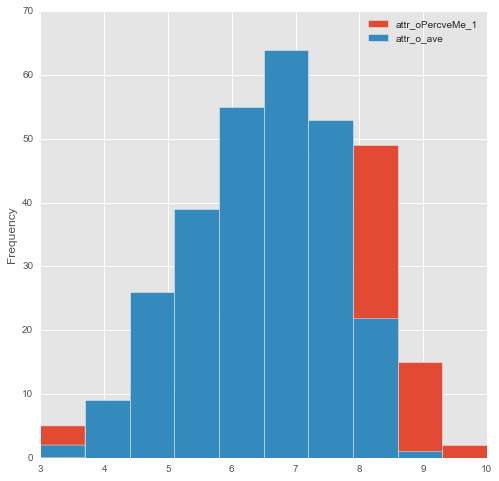

In [163]:
#histograms

#looking at how subject perceives themselves vs. how other's perceive them 
df_female_condensed[ ['attr_oPercveMe_1', 'attr_o_ave'] ].plot(kind = 'hist', figsize = (8, 8))

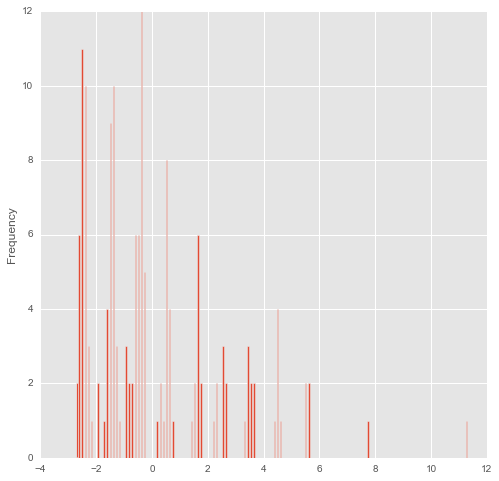

In [166]:
model = smf.ols(formula = 'match_sum ~ attr_oPercveMe_1', data = df_female_condensed).fit()

model.resid.plot(kind = 'hist', bins = 250, figsize = (8, 8))

plt.show()

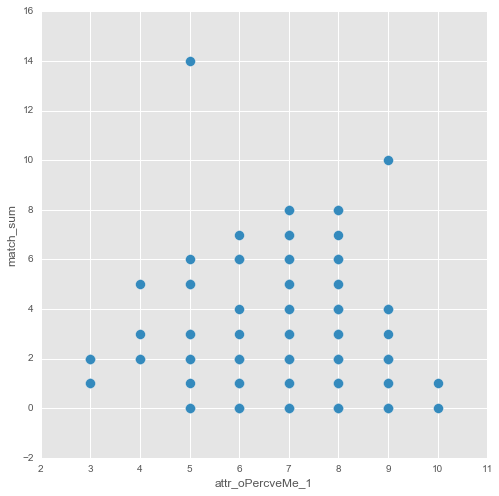

In [170]:
#scatter plot; independent variable vs the outcome variable

df_female_condensed[ ['attr_oPercveMe_1', 'match_sum'] ].plot(kind = 'scatter', x = 'attr_oPercveMe_1', y = 'match_sum', s = 100, figsize = (8, 8))

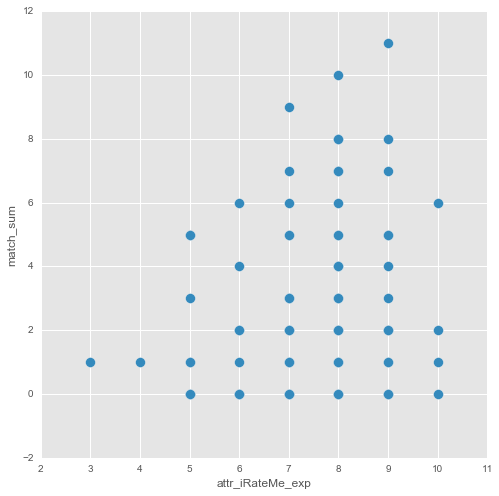

In [176]:
#looking at match_sum & attr_iRateMe_exp (during experiment, subject rates their attributes)
df_female_condensed.plot(kind = 'scatter', x = 'attr_iRateMe_exp', y = 'match_sum', s = 100, figsize = (8, 8))

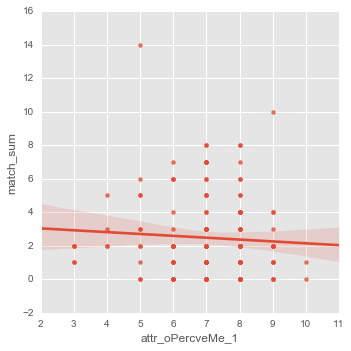

In [178]:
sns.lmplot(x = 'attr_oPercveMe_1', y = 'match_sum', data = df_female_condensed)

### *Male Dataset*

In [143]:
#create empty DF
df_male_condensed = pd.DataFrame()

In [144]:
#Load condensed data into new df
ConvertDF(df_male_raw,df_male_condensed)

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,intel_ave,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave
0,11,1,27.0,10,7.0,3.0,0.0,8.0,9.0,8.0,...,7.200000,7.600000,7.100000,5.100000,5.600000,8.800000,8.200000,5.400000,6.400000,4.700000
1,12,1,22.0,10,7.0,20.0,3.0,9.0,9.0,10.0,...,9.100000,5.900000,5.700000,4.700000,7.100000,6.600000,7.100000,6.700000,6.900000,5.500000
2,13,1,22.0,10,3.0,4.0,NaN,4.0,7.0,8.0,...,10.000000,10.000000,10.000000,10.000000,4.800000,7.900000,8.800000,7.000000,5.900000,5.300000
3,14,1,23.0,10,8.0,15.0,NaN,9.0,9.0,9.0,...,7.800000,8.200000,8.700000,8.300000,8.200000,7.600000,7.400000,7.600000,6.600000,6.700000
4,15,1,24.0,10,5.0,9.0,NaN,7.0,7.0,9.0,...,8.800000,7.500000,6.600000,5.400000,5.700000,7.600000,7.700000,7.200000,6.500000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,98,1,39.0,18,5.0,5.0,5.0,8.0,8.0,8.0,...,10.000000,1.111111,0.555556,1.666667,5.611111,7.666667,6.944444,4.111111,5.722222,4.111111
272,139,1,37.0,5,8.0,NaN,2.0,8.0,8.0,9.0,...,5.400000,7.000000,6.800000,0.000000,5.600000,7.000000,6.000000,5.800000,7.000000,4.800000
273,166,1,26.0,16,6.0,NaN,1.0,7.0,7.0,7.0,...,7.125000,6.812500,1.062500,0.000000,6.875000,6.562500,7.062500,6.312500,6.000000,4.312500
274,233,1,29.0,20,7.0,NaN,5.0,7.0,8.0,7.0,...,7.650000,7.700000,7.850000,0.000000,5.300000,6.700000,7.200000,5.850000,6.650000,4.950000


In [146]:
df_male_condensed.describe()

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,intel_ave,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave
count,276.000000,276.0,273.000000,276.000000,274.000000,64.000000,238.000000,274.000000,274.000000,274.000000,...,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,286.847826,1.0,26.578755,14.873188,5.854015,5.906250,3.178151,6.945255,8.105839,8.474453,...,7.145837,6.385864,6.178451,5.017003,5.864495,7.012646,7.315414,6.140951,6.497807,4.785312
std,159.585390,0.0,3.521236,5.089226,1.666477,5.458992,2.319525,1.429899,1.432141,1.113226,...,1.182255,1.213572,1.532775,1.706093,1.218203,0.816529,0.732209,1.123927,0.902398,1.000326
min,11.000000,1.0,18.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,2.333333,4.055556,4.333333,2.100000,3.166667,1.100000
25%,153.750000,1.0,24.000000,10.000000,5.000000,2.000000,2.000000,6.000000,7.000000,8.000000,...,6.555556,5.741071,5.541667,4.088158,5.035714,6.475564,6.828125,5.421429,5.885338,4.175837
50%,286.500000,1.0,27.000000,16.000000,6.000000,4.000000,3.000000,7.000000,8.000000,9.000000,...,7.187500,6.433036,6.384921,5.333333,5.918750,7.054094,7.400000,6.100000,6.470175,4.700000
75%,424.250000,1.0,29.000000,19.000000,7.000000,8.250000,4.000000,8.000000,9.000000,9.000000,...,7.800000,7.114583,7.093182,6.166667,6.789286,7.616228,7.894643,7.000000,7.100000,5.333333
max,552.000000,1.0,42.000000,22.000000,10.000000,20.000000,18.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,8.600000,8.800000,9.150000,8.500000,8.666667,7.700000


## Set index to iid

In [ ]:
#df = df.set_index('iid')